In [14]:
import numpy as np
import pandas as pd
import os

from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Settings both dataset paths

In [15]:
data_directory = os.path.join(os.getcwd(), '..', 'data')
complete_dataset_path = os.path.join(data_directory, 'complete')
biased_dataset_path = os.path.join(data_directory, 'biased')

Common variables

In [16]:
batch_size = 16
image_height = 100
image_width = 100

# Complete Model

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    complete_dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    complete_dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


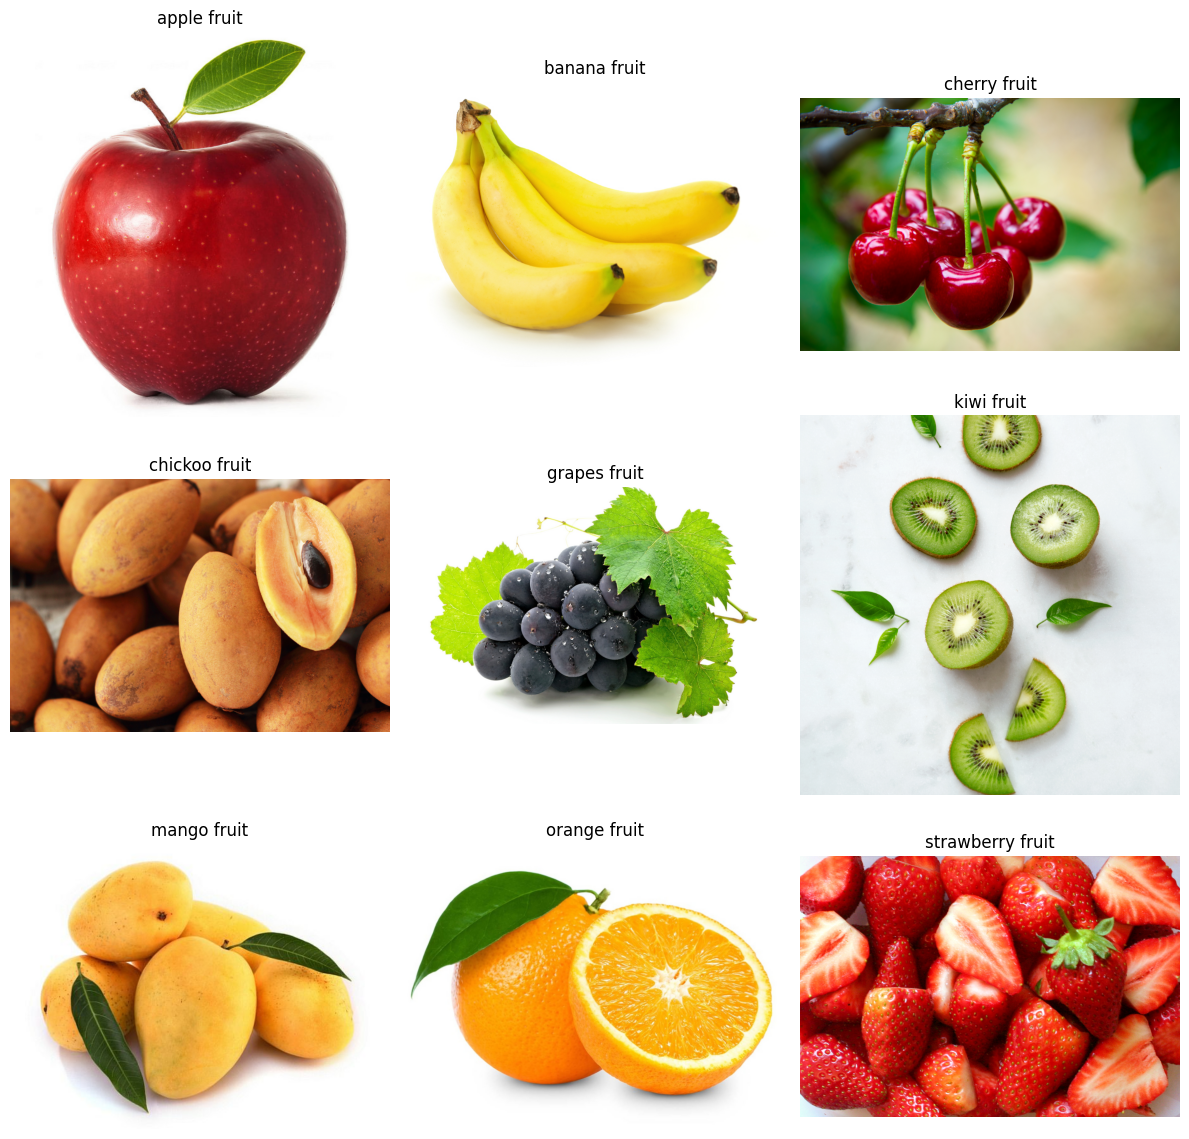

In [18]:
class_names = sorted(train_generator.class_indices.keys())
image_folder = complete_dataset_path

plt.figure(figsize=(12, 12))
fruit_folders = os.listdir(image_folder)

for i, folder in enumerate(fruit_folders):
    folder_path = os.path.join(image_folder, folder)
    if os.path.isdir(folder_path):
        image_files = os.listdir(folder_path)
        if len(image_files) > 0:
            image_path = os.path.join(folder_path, image_files[0])  # Get the first image in the folder

            image = Image.open(image_path)
            plt.subplot(3, 3, i+1)
            plt.imshow(image)
            plt.title(class_names[i])
            plt.axis('off')

plt.tight_layout()
plt.show()



In [19]:
complete_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [20]:
complete_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
#training

history = complete_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
18/18 [==============================] - 40s 2s/step - loss: 5.0414 - accuracy: 0.1285 - val_loss: 2.0217 - val_accuracy: 0.2500
Epoch 2/10
18/18 [==============================] - 20s 1s/step - loss: 1.8393 - accuracy: 0.3299 - val_loss: 1.7130 - val_accuracy: 0.3281
Epoch 3/10
18/18 [==============================] - 18s 1s/step - loss: 1.3722 - accuracy: 0.5799 - val_loss: 1.6178 - val_accuracy: 0.4375
Epoch 4/10
18/18 [==============================] - 23s 1s/step - loss: 0.9388 - accuracy: 0.7361 - val_loss: 1.2629 - val_accuracy: 0.5469
Epoch 5/10
18/18 [==============================] - 16s 907ms/step - loss: 0.5828 - accuracy: 0.8542 - val_loss: 1.1546 - val_accuracy: 0.5781
Epoch 6/10
18/18 [==============================] - 19s 1s/step - loss: 0.3308 - accuracy: 0.9444 - val_loss: 1.1346 - val_accuracy: 0.5625
Epoch 7/10
18/18 [==============================] - 15s 861ms/step - loss: 0.2163 - accuracy: 0.9653 - val_loss: 1.2217 - val_accuracy: 0.5469
Epoch 8/10
18/

In [22]:
test_generator = test_datagen.flow_from_directory(
    complete_dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = complete_model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 359 images belonging to 9 classes.
23/23 [==============================] - 18s 743ms/step - loss: 0.3069 - accuracy: 0.9220
Test loss: 0.3068529963493347
Test accuracy: 0.9220055937767029


Demonstration

In [23]:
complete_predictions = complete_model.predict(test_generator)
complete_predicted_labels = np.argmax(complete_predictions, axis=1)
complete_true_labels = test_generator.classes

23/23 [==============================] - 12s 489ms/step


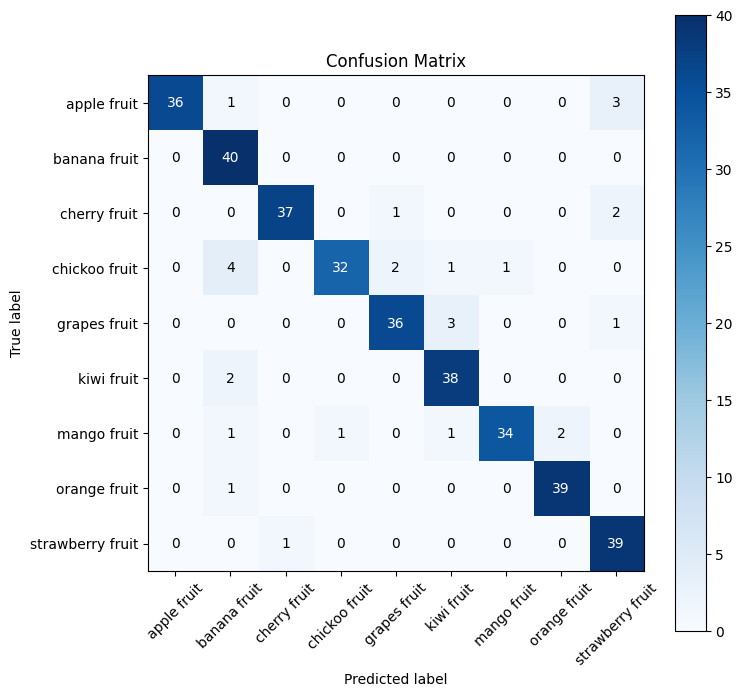

In [24]:
# Generate confusion matrix
cm = confusion_matrix(complete_true_labels, complete_predicted_labels)
class_names = sorted(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.show()

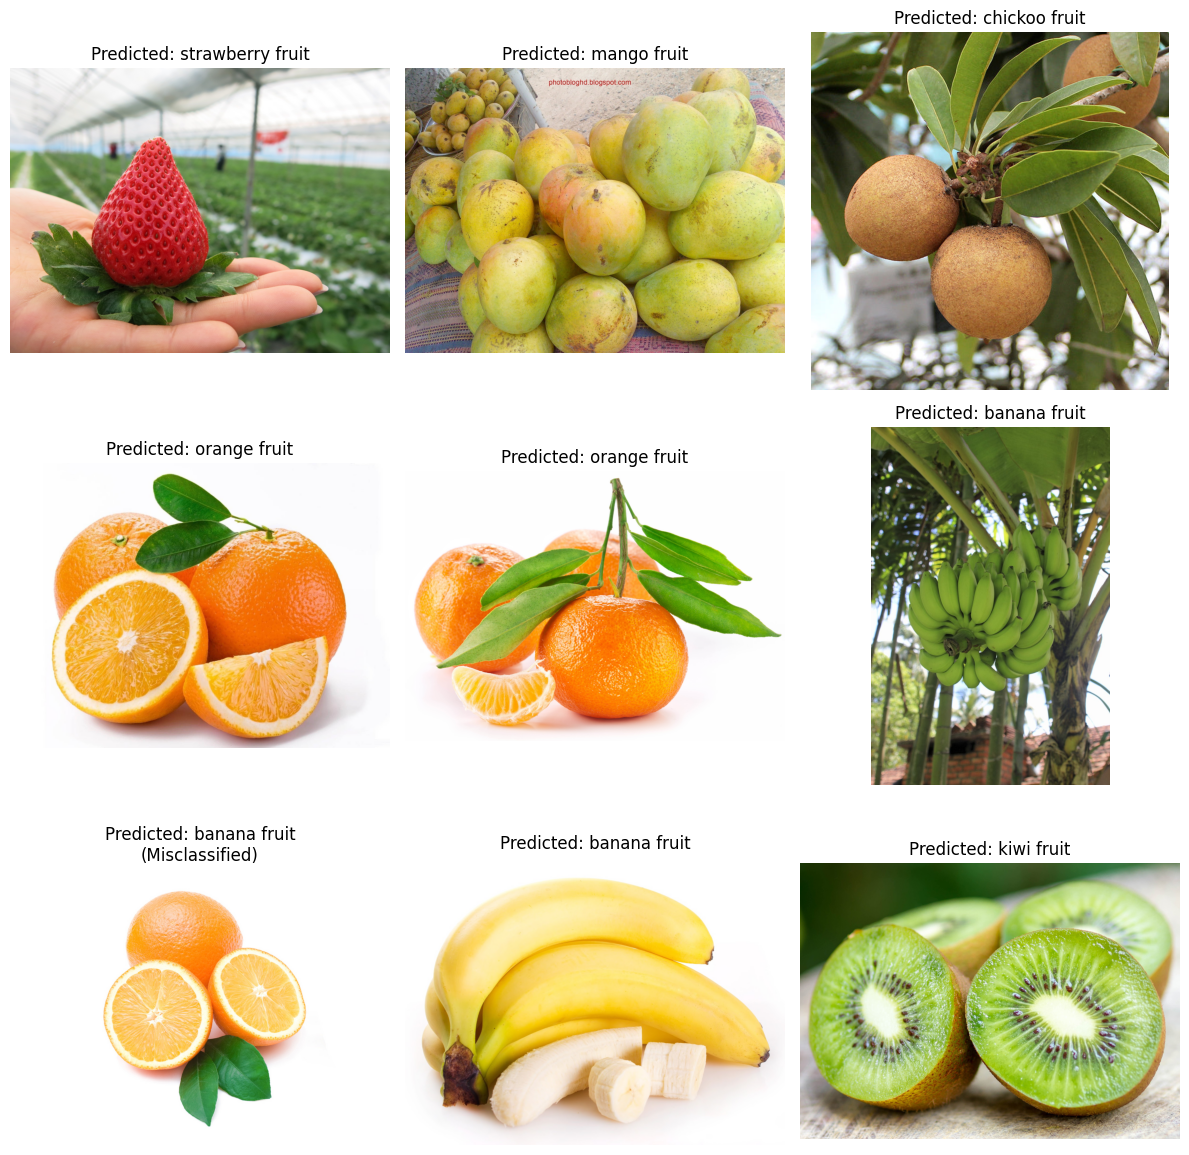

In [25]:
random_indices = np.random.choice(len(complete_predicted_labels), size=9, replace=False)

plt.figure(figsize=(12, 12))

# Plot random examples
for i, index in enumerate(random_indices):
    image_path = test_generator.filepaths[index]
    image = plt.imread(image_path)
    true_label = class_names[complete_true_labels[index]]
    predicted_label = class_names[complete_predicted_labels[index]]
    
    if predicted_label == true_label:
        title = f'Predicted: {predicted_label}'
    else:
        title = f'Predicted: {predicted_label}\n(Misclassified)'
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Biased Model

In [26]:
biased_train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

biased_train_generator = biased_train_datagen.flow_from_directory(
    biased_dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

biased_validation_generator = biased_train_datagen.flow_from_directory(
    biased_dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 112 images belonging to 9 classes.
Found 28 images belonging to 9 classes.


In [27]:
biased_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [28]:
biased_model.compile(optimizer='adam',
                     loss=tf.keras.losses.CategoricalCrossentropy(),
                     metrics=['accuracy'])

In [29]:
#training
biased_history = biased_model.fit(
    biased_train_generator,
    steps_per_epoch=biased_train_generator.samples // batch_size,
    epochs=10,
    validation_data=biased_validation_generator,
    validation_steps=biased_validation_generator.samples // batch_size
)

Epoch 1/10
7/7 [==============================] - 12s 2s/step - loss: 13.3962 - accuracy: 0.2321 - val_loss: 4.9743 - val_accuracy: 0.4375
Epoch 2/10
7/7 [==============================] - 7s 983ms/step - loss: 4.1841 - accuracy: 0.5000 - val_loss: 3.6937 - val_accuracy: 0.1875
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 2.2144 - accuracy: 0.5536 - val_loss: 1.1157 - val_accuracy: 0.5625
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.8100 - accuracy: 0.7143 - val_loss: 1.7234 - val_accuracy: 0.3750
Epoch 5/10
7/7 [==============================] - 9s 973ms/step - loss: 0.5675 - accuracy: 0.8393 - val_loss: 1.2831 - val_accuracy: 0.6875
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.2890 - accuracy: 0.9464 - val_loss: 1.2259 - val_accuracy: 0.6250
Epoch 7/10
7/7 [==============================] - 10s 1s/step - loss: 0.1731 - accuracy: 0.9911 - val_loss: 1.5476 - val_accuracy: 0.5625
Epoch 8/10
7/7 [================

In [30]:
test_generator = test_datagen.flow_from_directory(
    complete_dataset_path, # the testing is done on the complete dataset
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = biased_model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 359 images belonging to 9 classes.
23/23 [==============================] - 14s 597ms/step - loss: 1.6535 - accuracy: 0.5237
Test loss: 1.6535242795944214
Test accuracy: 0.523676872253418


Demonstration

In [31]:
predictions = biased_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

23/23 [==============================] - 14s 554ms/step


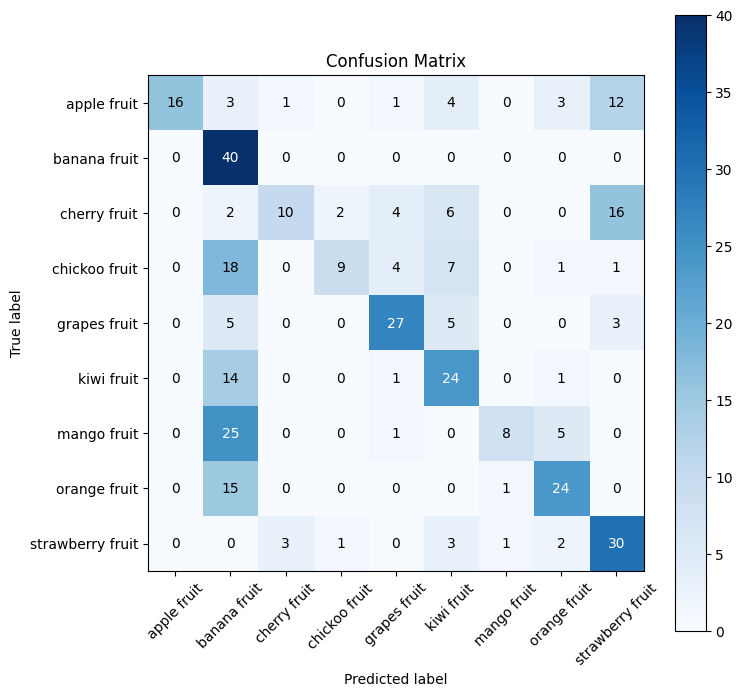

In [32]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
class_names = sorted(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.show()

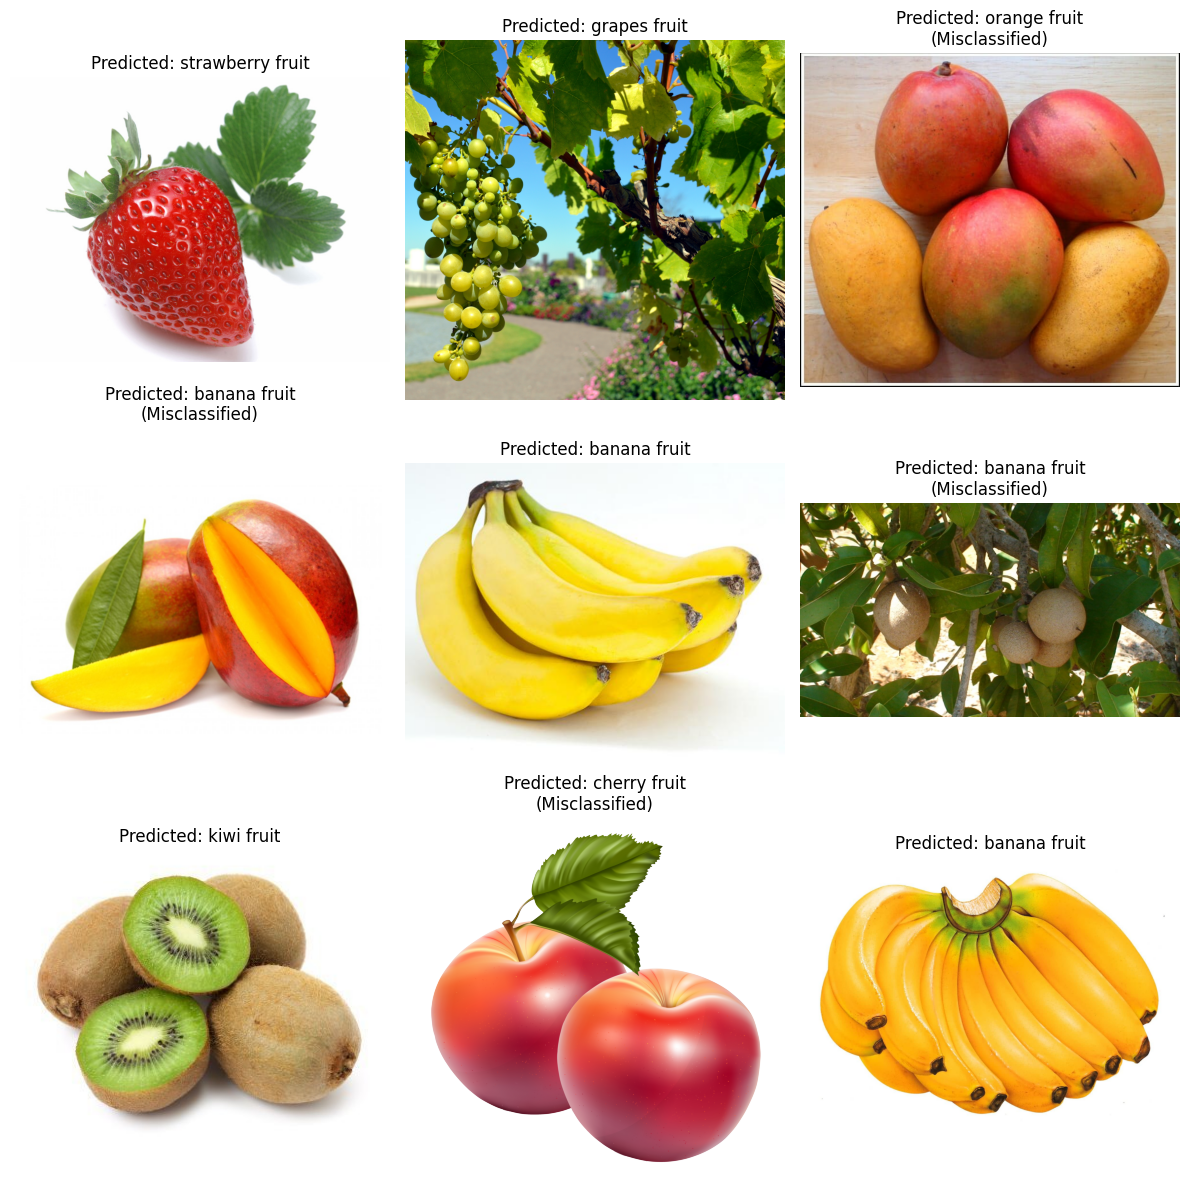

In [33]:
random_indices = np.random.choice(len(predicted_labels), size=9, replace=False)

plt.figure(figsize=(12, 12))

# Plot random examples
for i, index in enumerate(random_indices):
    image_path = test_generator.filepaths[index]
    image = plt.imread(image_path)
    true_label = class_names[true_labels[index]]
    predicted_label = class_names[predicted_labels[index]]
    
    if predicted_label == true_label:
        title = f'Predicted: {predicted_label}'
    else:
        title = f'Predicted: {predicted_label}\n(Misclassified)'
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()